<a href="https://colab.research.google.com/github/rupalidawkoregithub/Credit-Card-Default-Prediction/blob/main/Individual_Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Rupali Dawkore


# **Project Summary -**

This project aimed at predicting the case of customers default payment in taiwan. data is of 29999 customers with 6 months transiction history.

###**Evaluation Criteria:**
The evaluation criteria was based on Recall value , F1 SCore and Accurance percentages. Higher the score better will be the prediction

###**Problem Statement:**
The main objective of this project - credit card default prediction is to develop a model that accurately predicts the likelihood of a credit card holder defaulting on their debt payment in the near future. The model should take into account various factors such as the cardholder's credit history and other relevant financial information. The goal is to minimize false negatives (predicting a non-default when the cardholder actually defaults) and false positives (predicting a default when the cardholder is able to repay their debt) while maximizing the overall accuracy of the prediction.

###**Approach:**
The project for credit card default prediction aims to develop a model that can accurately predict the likelihood of a credit card holder defaulting on their payments. The project typically includes the following steps:

**Data cleaning and preprocessing:** Removing missing or irrelevant data and transforming the data into a format suitable for analysis.

**Exploratory Data Analysis (EDA):** Analyzing the distribution of the data and identifying any patterns or trends that may be relevant to the prediction model.different types of graphs by separating them into univariate, bivariate and multivariate categories as a result, We came accross some meaningful insights that helped us to make future decisions of ML model pipeline

**Feature selection:** Choosing the most relevant variables to include in the prediction model based on the results of the EDA.Under the umbrella of feature engineering we have detected and treated the outliers with the help of IQR technique and capped all the outliers of continous features in 25-75 percentile. Also, we noticed that some of the features were categorical in nature and ML model can not understand the language of alphabets(strings).So, we have encoded them into numericals using One-Hot Encoding technique as they were unordered in nature.

**Model development:** Training and testing different machine learning algorithms, such as decision trees, random forests, and XG Boot, to find the best model for predicting credit card default.

**Model evaluation:** Evaluating the performance of the selected model using metrics such as accuracy, precision, recall, and F1 score.

The successful implementation of this model can help credit card companies make informed decisions about the risk associated with lending to individual customers and can also aid customers in managing their credit card debt.

# **GitHub Link -**

**Rupali Dawkore Github** : https://github.com/rupalidawkoregithub/Credit-Card-Default-Prediction

# **Problem Statement**


The problem statement for credit card default prediction is to develop a model that accurately predicts the likelihood of a credit card holder defaulting on their debt payment in the near future. The model should take into account various factors such as the cardholder's credit history and other relevant financial information. The goal is to minimize false negatives (predicting a non-default when the cardholder actually defaults) and false positives (predicting a default when the cardholder is able to repay their debt) while maximizing the overall accuracy of the prediction.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing basic libraries for data processing
import numpy as np
import pandas as pd
import math
from datetime import datetime
# Importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Adding this to ignore future warnings
import warnings
warnings.filterwarnings("ignore")
# importing missingo library which helps us to visualize the missing values
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 

In [ ]:
#pip install --upgrade xlrd         ##run the cell at every restart of runtime

In [ ]:
# Mount the Google Drive for Import the Dataset
from google.colab import drive
drive.mount('/content/drive')

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_excel('/content/drive/MyDrive/Credit Card Default Prediction - Classification/default of credit card clients.xls',header=1)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

Checked first five rows of dataset

In [ ]:
df.tail()

Checked last five rows of dataset

### Dataset Rows & Columns count

In [ ]:
# Get the number of rows and columns
rows, columns = df.shape

In [ ]:
# Print the number of rows and columns
print("Number of rows: ", rows)
print("Number of columns: ", columns)

There are 30000 rows and 25 columns in the dataset.

### Dataset Information

In [ ]:
# Dataset Info
df.info()

All types of columns dtypes are integer

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"Number of duplicated rows in default of credit card clients dataset: {df.duplicated().sum()}")

We do not have any duplicated rows in the dataset and that is very good for us.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values 
print(f"Null values count in default of credit card clients dataset:\n{df.isna().sum()}\n")
print("-"*50)
print(f"Infinite values count in default of credit card clients dataset:\n{df.isin([np.inf, -np.inf]).sum()}\n")

We don't have null or infinite values default of credit card clients dataset.

In [ ]:
# Visualizing the missing values in default of credit card clients dataset
msno.bar(df,figsize=(10,5), color="tab:green")

Dataset dose not contains any NA values, null values and duplicates.

### What did you know about your dataset?

The data provided is a sample of a credit card default dataset. The first row provides the header information, with each column indicating a feature of the credit card holder. The first column (ID) is the unique identifier for each record. The second column (LIMIT_BAL) indicates the credit limit of the credit card. The third column (SEX) indicates the gender of the cardholder. The fourth column (EDUCATION) indicates the level of education of the cardholder. The fifth column (MARRIAGE) indicates the marital status of the cardholder. The sixth column (AGE) indicates the age of the cardholder. The seventh to sixteenth columns (PAY_0 to PAY_9) indicate the repayment status for the last ten months. The remaining columns (BILL_AMT1 to BILL_AMT6, PAY_AMT1 to PAY_AMT6) indicate the amount of bill statement and amount paid in the last six months. The final column (default payment next month) is the target variable and indicates whether the cardholder defaulted on their payment in the next month (1) or not (0).

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

 # Descriptive Statistics

Now we see the descriptive statistics such as count, mean, standard deviation, minimum,maximum, quantiles

In [ ]:
# Dataset Describe
df.describe().T

**Inference:**

- There are around 30000 distict credit card clients.
- The average value of credit card Limits is Rs 1,67,484.
- The Limited Balance has a high Standard deviation as the meadian value is Rs 1,40,000 and the extreme values as Rs 10,00,000.
- Here the average is about 35 and meadian is 28 with a standard deviation of 9.2. This difference is explained by some very old people in the data set as given that the maximum age is 79.
- Bill Amount and Pay Amount also shows us that there some people with extremely high bill amount which may be because for the higher Credit Limit or because of the pending dues added up. 
- Bill amount for all the months, the mean is around 40,000 to 50,000 with some extreme amount in bill amount 3 of Rs 16,64,089.
- Pay amount for all the months, the mean is around Rs 4800 to Rs 5800, with some extreme values such as Rs 16,64,089.
- As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

### Variables Description 

**ID:** ID of each client

**LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit

**SEX:** Gender (1=male, 2=female)

**EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

**MARRIAGE:** Marital status (1=married, 2=single, 3=others)

**AGE:** Age in years

**PAY_0:** Repayment status in September, 2005 (-1=pay duly, 1=payment delay for

one month, 2=payment delay for two months,8=payment delay for eight months,

9=payment delay for nine months and above)

**PAY_2:** Repayment status in August, 2005 (scale same as above)

**PAY_3:** Repayment status in July, 2005 (scale same as above)

**PAY_4:** Repayment status in June, 2005 (scale same as above)

**PAY_5:** Repayment status in May, 2005 (scale same as above)

**PAY_6:** Repayment status in April, 2005 (scale same as above)

**BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar)

**BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar)

**BILL_AMT3:** Amount of bill statement in July, 2005 (NT dollar)

**BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar)

**BILL_AMT5:** Amount of bill statement in May, 2005 (NT dollar)

**BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)

**PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar)

**PAY_AMT2:** Amount of previous payment in August, 2005 (NT dollar)

**PAY_AMT3:** Amount of previous payment in July, 2005 (NT dollar)

**PAY_AMT4:** Amount of previous payment in June, 2005 (NT dollar)

**PAY_AMT5:** Amount of previous payment in May, 2005 (NT dollar)

**PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)

**default.payment.next.month:** Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [ ]:
df.columns

In [ ]:
# Check Unique Values for each variable.
def get_all_unique_values(df):
    for col in df.columns:
        print(f"Unique values in column '{col}':")
        print(df[col].unique())
        print("-"*50)

In [ ]:
# Get and print all unique values
get_all_unique_values(df)

In [ ]:
# We dont need to ID Column so we drop it
df.drop(['ID'],axis=1,inplace=True)

In [ ]:
pd.options.display.max_columns = 25
df.head(10)


In [ ]:
df.info()

## 3. ***Data Wrangling***

### Data Wrangling Code

Copied dataset for data wrangling.

In [ ]:
df1 = df.copy()

Some of the columns didn’t make sense to me, so I decided to rename them into more understandable terms.

In [ ]:
# Rename target column
df1 = df.rename(columns={'default payment next month':'default'})

In [ ]:
df1.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df1.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df1.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
#replacing values with there labels
df1.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df1.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df1.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df1.replace({'default' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [ ]:
# After renamed look of dataset
df1.head(10)

In [ ]:
#category wise values
df1['EDUCATION'].value_counts()

In education column, values such as 5,6 and 0 are unknown. Let's combine those values as others.

In [ ]:
#replcae values with 5, 6 and 0 to Others
df1.EDUCATION = df1.EDUCATION.replace({5: "Others", 6: "Others",0: "Others"})

In [ ]:
# Rechecking value count of education column after combine others values
df1['EDUCATION'].value_counts()

In [ ]:
#category wise values
df1['MARRIAGE'].value_counts()

In marriage column, 0 values are not known. Combine those values in others category.

In [ ]:
#replace 0 with Others
df1.MARRIAGE = df1.MARRIAGE.replace({0: "Others"})

In [ ]:
# Rechecking
df1['MARRIAGE'].value_counts()

**Checking Distribution of default or non-default case**



In [ ]:
mi0 = df[df['default payment next month']==0]
mi1 = df[df['default payment next month']==1]

In [ ]:
mi0.value_counts().sum()  # Non-Default => 0 or NO

In [ ]:
mi1.value_counts().sum()  # Default => 1 or YES

In [ ]:
df.columns

In [ ]:
con_col=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# Checking Distribution of Non - Default 
plt.figure(figsize=(20,20))
for num,i in enumerate(con_col):
    plt.subplot(6,5,num+1)
    sns.distplot(mi0[i],color='g')
    plt.tight_layout()
plt.show()

In [ ]:
# Checking Distribution of Default Case 
plt.figure(figsize=(20,20))
for num,i in enumerate(con_col):
    plt.subplot(6,5,num+1)
    sns.distplot(mi1[i],color='r')
    plt.tight_layout()
plt.show()

### What all manipulations have you done and insights you found?

1. I have Changed the Name of a columns with its meaningfull name

2. Grouped unknown EDUCATIONcategories (0,5,6) and re-assigned them to 4 (others)

3. Grouped unknown MARRIAGEcategories (0) and re-assigned them to 3 (others)

4. Checking Distribution of default or non-default case

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Univariate**

In [ ]:
df1.columns

## Chart - 1

In [ ]:
#Plotting payment staus using countplot
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
plt.figure(figsize=(20,20))
for num,i in enumerate(pay_col):
    plt.subplot(4,3,num+1)
    sns.countplot(df1[i])
    plt.tight_layout()
plt.show()

Each column represents the status of payment for a given month:

**1.'PAY_SEPT':** Represents the payment status in September.

**2.'PAY_AUG':** Represents the payment status in August.

**3.'PAY_JUL':** Represents the payment status in July.

**4.'PAY_JUN':** Represents the payment status in June.

**5.'PAY_MAY':** Represents the payment status in May.

**6.'PAY_APR':** Represents the payment status in April.

The countplot is used to visualize the distribution of the values in each of these columns. It shows the count of each unique value in the column, creating a histogram-like representation. The goal of this visualization is to see the frequency of each payment status, which can help understand the overall payment behavior of credit card customers in the data.






## Chart - 2

###**Distribution of balance limit of credit card of customer**

In [ ]:
import plotly.express as px
fig1 = px.histogram(df1, x = 'LIMIT_BAL', marginal = 'box',
                    title = 'Distribution of balance limit of card', 
                    labels = {'x': 'Dollar($)', 'y': 'Number of card'},
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig1.update_layout(width=900, height=700)
fig1.show()

It is found that limit balance feature is **right skewed, middle 50% of value lie between 50K to 240k. few of limit goes beyond 530k taiwan dollar.**

##### 1. Why did you pick the specific chart?

The Histogram chart was picked because it is well-suited for visualizing the distribution of a single variable and provides useful information about the **shape and properties of the data**.

##### 2. What is/are the insight(s) found from the chart?

The purpose of using this specific chart is to visualize the distribution of the balance limit of credit cards. The histogram provides a visual representation of the frequency of each balance limit range, while the box plot summarizes the distribution by showing the median, quartiles, and outliers.

##### 3. Will the gained insights help creating a positive business impact? 

Yes, Insights can help the business to better understand their customers and make informed decisions about credit risk.

### **Distribution of Target column on the basis of Percentage**

In [ ]:
# Distribution of Target column on the basis of Percentage
plt.figure(figsize = [10, 5])
plt.title("Default payment next month")
df1["default"].value_counts().plot.pie(explode = [0, 0.10], autopct = '%1.3f%%', shadow = True)

##### 1. Why did you pick the specific chart?

Bar charts are typically used to compare the values of categorical data and show the distribution of data over time. They are good for visualizing data for a small number of categories and allow for easy comparison of values.

##### 2. What is/are the insight(s) found from the chart?

We can say that Number of not default cardholders have higher % then Defaulters

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This is the positive impact that less number of cardholders are defaulters

In [ ]:
# values count plot of Default
plt.figure(figsize=(5,5))
sns.countplot(x = 'default', data = df1)

This plot gives us an insight into the class distribution in the target variable. It is observed that the classes are not proportionate, indicating an imbalanced dataset. The data shows that there are **23,000 non-defaulters and 6,000 defaulters** , which means that this is a case of **imbalanced data**.

## Chart - 3

In [ ]:
# values count plot of Marriage
plt.figure(figsize=(5,5))
sns.countplot(x = 'MARRIAGE', data = df1)

##### 1. Why did you pick the specific chart?

The countplot was chosen because it is a straightforward and effective way to visualize the distribution of categorical data.

##### 2. What is/are the insight(s) found from the chart?

We have more counts for single than other two 

# **Bivariate**

## Chart - 4

###**What is a qualification of the card holder**

In [ ]:
df_vis = df1['EDUCATION'].value_counts().reset_index()
df_vis.columns = ['Education', 'No of people']
fig1 = px.pie(df_vis, values = 'No of people', names = 'Education',color_discrete_sequence =  px.colors.sequential.Plasma,
             title = 'Education qualification of credit card holder')
fig1.update_layout(width=500, height=400)
fig1.show()

Here,
 2: **University**
 1: **Graduate School**
 3: **High School**
 4: **Others** 

*   47% of them have university qualification
*   35% of them have graduate school qualification 
*   16% of them have high school qualification 
*   2% of them qualification are unknown


##### 1. Why did you pick the specific chart?

Pie Chart : It is suitable for visualizing the distribution of categorical data, such as education levels in this case. Pie charts are effective in showing how each category contributes to the total and are easy to understand for most people. The use of a pie chart allows for a quick and clear representation of the distribution of education levels among credit card holders in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart can be determined by looking at the proportions of the different education levels in the pie chart. Example If the majority of the credit card holders have a certain education level, this may suggest a trend or pattern in terms of who is more likely to have a credit card.

##### 3. Will the gained insights help creating a positive business impact?

If the goal of the business is to target certain segments of the population with marketing campaigns, the information from this insight could be used to identify education levels that are overrepresented or underrepresented among credit card holders.

## Chart - 5

###**Distribution of default customers whose age is below 40**

In [ ]:
# violin plot using the Seaborn library that visualizes the distribution of ages of the credit card holders who are less than 40 years old
sns.violinplot(x='default', y='AGE', data=df1[df1['AGE']<40], palette='cool')

violinplot : That visualizes the distribution of ages of credit card holders who are less than 40 years old, split by their payment default status.

##### 1. Why did you pick the specific chart?

This plot specifically used to compare the distribution of ages for credit card holders who defaulted on their payments and those who did not. The violin plot allows us to visualize the distribution of ages for each category and identify any potential differences or similarities in the age distribution between the two categories. This information can be useful in understanding the relationship between age and payment default status.

##### 2. What is/are the insight(s) found from the chart?

The insights that can be found from this violin plot are based on the comparison of the distributions of the ages of credit card holders who defaulted on their payments and those who did not.
Some potential insights that could be gained from this chart include:
    
    
   
    

*   **Distribution Shape :** The shape of the violin plot can provide information about the distribution of the data.

*   **Central Tendency:** The box inside the violin plot shows the median and quartiles of the data, which give an indication of the central tendency of the distribution.
*    **Spread:** The width of the violin plot represents the density of the data, giving an indication of the spread of the distribution.


*   **Outliers:** The violin plot can also show any outliers in the data, which are values that fall outside of the distribution.



## Chart - 6

###**Distribution of Age of credit card holder**

In [ ]:
fig2 = px.histogram(df1, x = 'AGE', marginal = 'box',
                    title = 'Distribution of Age of card holder', 
                    labels = {'x': 'Dollar($)', 'y': 'Noumber of card'},
                   color_discrete_sequence=px.colors.qualitative.D3,
                   nbins = 75)
fig2.update_layout(width=500, height=400)
fig2.update_traces(marker_line_width=1,marker_line_color="white")

The ages of the credit card holders are taken from the**"AGE"**column in the DataFrame.The histogram has a **box plot** on the right side that shows the **distribution of the ages**.


##### 1. Why did you pick the specific chart?

Histogram is used to visualize the distribution of numerical data.It can provide an understanding of the distribution of ages among the credit card holders in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The insights found the distribution of ages in the histogram.It's shows the frequency of credit card holders within different age intervals, which can give us a general understanding of the age distribution among credit card holders. **Example**, If the histogram shows a concentration of credit card holders in a certain age range, this may suggest that people within that age range are more likely to have a credit card.

## Chart - 7

###**Distribution of credit limit for default and non-default cases with limit balance**

In [ ]:
sns.boxplot(x="default", y="LIMIT_BAL", data=df1)
plt.show()

We have more limit balance for Non-Defaluters than Defaulters.

###**Sex With Respective to Default** 

**or** 

###**How many male and female are credit card defaulter.**

In [ ]:
# count plot for Sex and with respect to Default
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df1)
sns.countplot(x = 'SEX', hue = 'default',ax = axes[1], data = df1)

First we have observe that female have more counts than males and in second observeration females are more defaluters than male.

###**Education With Respective to Default**

In [ ]:
# count plot for EDUCATION and with respect to Default
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = df1)
sns.countplot(x = 'EDUCATION', hue = 'default',ax = axes[1], data = df1)

First we have observe that university have more counts than other education and in second observeration university are more defaluters than others 3 categories.

###**Marriage With Respective to Default**

In [ ]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df1)
sns.countplot(x = 'MARRIAGE', hue = 'default',ax = axes[1], data = df1)

First we have observe that single status have more counts than other 2 status and in second observeration Married or Single status have same counts defaluters.

# **Multivariate**

## Chart - 8

In [ ]:
# Chart - 3 visualization code
#Creating new variables
var = df1[['SEX', 'LIMIT_BAL','AGE']].copy()
var['default'] = df1['default']

#replace values in varibles with original names
var.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}},inplace = True)


In [ ]:
#taking catplot for the given variable
sns.catplot(x = "SEX",
            y = "LIMIT_BAL",
            kind = "box",
            hue = "default",
            color = '#0c4f4e',
            data = var, saturation = 2,
            margin_titles = True).set(title = "limit balance by sex and default payments");

##### 1. Why did you pick the specific chart?

Catplot is used in Seaborn to create categorical plots, which are plots that show the relationship between a categorical variable i.e SEX and one continuous variables i.e LIMIT_BAL. These plots are useful for visualizing the distribution and spread of data.

##### 2. What is/are the insight(s) found from the chart?

There are **more Female defaulters than men** ,female have more ouliers in Limit Balance Variable

## Chart - 9 

### **Correlation Heatmap**

In [ ]:
df1.columns

In [ ]:
df1.info()

**Label Encoding**

In [ ]:
# Importing LabelEncoder library
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Convert categorical columns to numerical values using label encoding
df1['SEX'] = le.fit_transform(df1['SEX'])
df1['EDUCATION'] = le.fit_transform(df1['EDUCATION'])
df1['MARRIAGE'] = le.fit_transform(df1['MARRIAGE'])
df1['default'] = le.fit_transform(df1['default'])

# Convert the columns to int data type
df_copy = df1.astype({"SEX":"int","EDUCATION":"int","MARRIAGE":"int","default":"int"})

In [ ]:
df_copy.info()

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize = [25, 15])
corr_matrix = df_copy.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


##### 1. Why did you pick the specific chart?

This chart is use to find the corelation between different pararmentrs in the dataset.

##### 2. What is/are the insight(s) found from the chart?

From the correlation matrix there no any clear picture but we can say that Pay and Bill amt are positively correlated and Pay negatively correlated with Pay amt.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Null Hypothesis - There is no relation between Categorical Variables and Default

   Alternate Hypothesis - There is a relationship between Categorical Variables and Default

2. Null Hypothesis - There is no relation between Numeric Variable and Default

   Alternate Hypothesis - There is a relation between Numeric Variable and Default

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1- Null Hypothesis - There is no relation between Categorical Variables and Default

Alternate Hypothesis - There is a relationship between Categorical Variables and Default

#### 2. Perform an appropriate statistical test.

In [ ]:
df_copy.columns

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

def hypothesis_test_chi2(df_copy, categorical_variable, alpha=0.05):
    # Split the data into default and non-default groups
    default = df_copy[df_copy['default'] == 1]
    non_default = df_copy[df_copy['default'] == 0]

    # Conduct a chi-square test for the independence of the categorical variable and default
    cont = pd.crosstab(df_copy['default'], df_copy[categorical_variable])
    chi2, p_value, dof, expected = chi2_contingency(cont)

    # Make a decision based on the p-value and alpha
    if p_value < alpha:
        return f"Reject the null hypothesis. There is a significant association between {categorical_variable} and default."
    else:
        return f"Fail to reject the null hypothesis. There is no significant association between {categorical_variable} and default."

In [ ]:
# Define a list of categorical variables
categorical = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
# Loop through the list of categorical variables
for categorical_variable in categorical:
    result = hypothesis_test_chi2(df_copy, categorical_variable)
    print(result)

##### Which statistical test have you done to obtain P-Value?

The function hypothesis_test_chi2 performs a chi-square test for independence to obtain the p-value. The chi2_contingency function from the scipy.stats library is used to calculate the chi-square statistic and the p-value.

##### Why did you choose the specific statistical test?

The chi-square test for independence is a common test for determining if there is a significant association between two categorical variables. In this case, the categorical variable of interest and the binary outcome variable "default" are being tested for independence. The choice of the chi-square test for independence is appropriate for this type of analysis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

2- Null Hypothesis - There is no relation between Numeric Variable and Default

Alternate Hypothesis - There is a relation between Numeric Variable and Default

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

def hypothesis_test_t(df_copy, numerical_variable, alpha=0.05):
    # Split the data into default and non-default groups
    default = df_copy[df_copy['default'] == 1][numerical_variable]
    non_default = df_copy[df_copy['default'] == 0][numerical_variable]

    # Conduct a two-sample t-test for the means of the numerical variable for default and non-default groups
    t, p_value = ttest_ind(default, non_default)

    # Make a decision based on the p-value and alpha
    if p_value < alpha:
        return f"Reject the null hypothesis. There is a significant difference in the means of {numerical_variable} between default and non-default groups."
    else:
        return f"Fail to reject the null hypothesis. There is no significant difference in the means of {numerical_variable} between default and non-default groups."

In [ ]:
numerical_columns = ['LIMIT_BAL','AGE','BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
for col in numerical_columns:
    result = hypothesis_test_t(df_copy, col, alpha=0.05)
    print(result)

##### Which statistical test have you done to obtain P-Value?

The function hypothesis_test_t performs a two-sample t-test to obtain the p-value. The ttest_ind function from the scipy.stats library is used to calculate the t-statistic and the p-value

##### Why did you choose the specific statistical test?

The two-sample t-test is a common test for determining if there is a significant difference in means between two groups. In this case, the two groups are the default and non-default groups for a numerical variable. The choice of the two-sample t-test is appropriate for this type of analysis when the numerical variable is continuous and the sample size is relatively small.

## ***6. Feature Engineering & Data Pre-processing***

#### To identify the categorical, numerical columns, and input and target columns

In [ ]:
df_copy.columns

In [ ]:
# independant variable
Input_columns=[ 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
# dependent variable
Target_column=["default"]

In [ ]:
categorical_columns = ['SEX','EDUCATION','MARRIAGE','PAY_SEPT', 'PAY_AUG',
       'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

In [ ]:
numerical_columns = ['LIMIT_BAL','AGE','BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

### 1. Handling Missing Values

In [ ]:
# Looking for null value by using .info
df_copy.info()

### 2. Handling Outliers

In [ ]:
# Checking skewness for numerical columns
import scipy.stats as stats
for col in numerical_columns:
    skewness = stats.skew(df_copy[col])
    print("Skewness of column {}: {:.2f}".format(col, skewness))

In [ ]:
plt.figure(figsize=(15,15))
for num,cols in enumerate(numerical_columns):
    plt.subplot(5,3,num+1)
    sns.boxplot(df_copy[cols])
    plt.title(f'{cols.title()}',weight='bold')
    plt.tight_layout()
    #print(' Box Plot of',cols)
plt.show()

From the boxplot, it can be observed that the columns: LIMIT_BAL , AGE ,  BILL_AMT_SEPT , BILL_AMT_AUG , BILL_AMT_JUL , BILL_AMT_JUN , BILL_AMT_MAY , BILL_AMT_APR , PAY_AMT_SEPT , PAY_AMT_AUG , PAY_AMT_JUL , PAY_AMT_JUN , PAY_AMT_MAY , and  PAY_AMT_APR contain outliers.


In [ ]:
print("Number of Outlier Records:")

for col in numerical_columns:
    upper = df_copy[col].quantile(0.75) + 1.5 * (df_copy[col].quantile(0.75) - df_copy[col].quantile(0.25))
    outliers = df_copy[df_copy[col] > upper][col].count()
    print("{}: {}".format(col, outliers))


Calculates the upper bound of outliers using the interquartile range (IQR) and then counts the number of values in each column that are greater than this upper bound.

# Capping

In [ ]:
for col in numerical_columns:
    upper = df_copy[col].quantile(0.75) + 1.5 * (df_copy[col].quantile(0.75) - df_copy[col].quantile(0.25))
    df_copy[col] = np.where(df_copy[col] > upper, upper, df_copy[col])
    print("{}: {}".format(col, outliers))


The upper bound of outliers is calculated using the interquartile range (IQR) as in the previous code. Then, using np.where, the values in each column that are greater than the upper bound are replaced with the upper bound. And performs the capping of the outliers.

In [ ]:
# Rechecking outliers for numerical columns
plt.figure(figsize=(15,15))
for num,cols in enumerate(numerical_columns):
    plt.subplot(5,3,num+1)
    sns.boxplot(df_copy[cols])
    plt.title(f'{cols.title()}',weight='bold')
    plt.tight_layout()
    #print(' Box Plot of',cols)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

The **Interquartile Range (IQR)** is a robust measure of variability that is often used to identify outliers in skewed (non-normal) data. The IQR is calculated as the difference between the 75th and 25th percentiles of a dataset and provides a summary of the spread of the middle 50% of the data. Outliers are defined as observations that fall outside of the range of Q1 - 1.5 * IQR to Q3 + 1.5 * IQR, where Q1 is the 25th percentile and Q3 is the 75th percentile.

the IQR techniques are used to handle right or left skewed data and it is efficient to use IQR.

In [ ]:
df_copy.head()

In [ ]:
df_copy.info()

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
def replace_values(df_copy, col, values):
    # This code is replacing all values of -2, -1, and 0 in the specified columns with 0.
    fil = (df_copy[col] == -2) | (df_copy[col] == -1) | (df_copy[col] == 0)
    df_copy.loc[fil, col] = values

columns = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']				
values = 0

for col in columns:
    replace_values(df_copy, col, values)

This code is replacing all values of -2, -1, and 0 in the specified columns with 0.

In [ ]:
def replace_values(df_copy, col, values):
    #  This code is replacing all values greater then 0 in the specified columns with 0.
    fil = (df_copy[col] < 0)
    df_copy.loc[fil, col] = values

columns = ['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']						
values = 0

for col in columns:
    replace_values(df_copy, col, values)

As negative Bill Amount paid indicates that the person has paid his due payment already. Hence, we transform the data as above

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
fil = (df_copy.PAY_SEPT == 0) & (df_copy.PAY_AUG == 0) & (df_copy.PAY_JUL == 0) & (df_copy.PAY_JUN == 0) & (df_copy.PAY_MAY == 0) & (df_copy.PAY_APR == 0) & (df_copy['default'] == 1)
df_copy.loc[fil,'default'] = 0


As customers who have not defaulted in any month cannot be potential defaulters hence, we have transformed the data as above.

In [ ]:
# Select your features wisely to avoid overfitting
fil = (df_copy.PAY_SEPT > 0) & (df_copy.PAY_AUG > 0) & (df_copy.PAY_JUL > 0) & (df_copy.PAY_JUN > 0) & (df_copy.PAY_MAY > 0) & (df_copy.PAY_APR > 0) & (df_copy['default'] == 0)
df_copy.loc[fil,'default'] = 1

As customers who have defaulted in every month are the potential defaulters hence, we have transformed the data as above.

In [ ]:
df_copy.info()

**Binning the 'AGE' column**

In [ ]:
print(df_copy['AGE'].min())
print(df_copy['AGE'].max())

we can see here min age is 21.0 and maximum age is 60.5 in our dataset

In [ ]:
# creating function to create the cohort for age group
def age(x):
    if x in range(21,41):
        return 1
    elif x in range(41,61):
        return 2
    elif x in range(61,80):
        return 3

df_copy['AGE']=df_copy['AGE'].apply(age)

In [ ]:
df_copy.info()

In [ ]:
df_copy.isnull().sum()

In [ ]:
#Replacing the Null values with suitable value
df_copy['AGE'].fillna(df_copy['AGE'].mode()[0],inplace=True)

the ages are into three categories, By applying the categorize_age function to the AGE column of the dataframe, the original ages in the column are transformed into categorical values.

In [ ]:
#visualizing age group
plt.figure(figsize=(10,8),dpi=60)
sns.countplot(x=df_copy['AGE'].sort_values(),data=df_copy,hue='default')

In [ ]:
df_copy.head()

**obsevation:**
In aur dataset we can clearly see that most of the credit card holder are of age between 21 to 41 , so we can say that company's target customer are mostly youngster.

**Binning the 'PAY' column**

In [ ]:
def bins(x):
    if x == -2:
        return 'Paid Duly'
    if x == 0:
        return 'Paid Duly'
    if x == -1:
        return 'Paid Duly'
    if x in range(1,4):
        return '1 to 3'
    if x in range(4,7):
        return '4 to 6'
    if x in range(7,9):
        return '7 to 9'

for i in df_copy[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']]:						
    df_copy[i]=df_copy[i].apply(bins)

The values of the columns 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', and 'PAY_APR' in the DataFrame 'df_copy'.

For each value of these columns, the 'bins' function is being applied, which maps the values to one of four categorical bins:

Paid Duly (for values of -2, 0, or -1)

1 to 3 (for values in the range 1 to 3)

4 to 6 (for values in the range 4 to 6)

7 to 9 (for values in the range 7 to 9)

In [ ]:
df_copy.head()

### 4. Categorical Encoding

**One Hot Encoding**

In [ ]:
df_copy.info()

In [ ]:
# Encode your categorical columns
# Importing
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#categorical features
categorical_cols_to_encode = ['EDUCATION', 'MARRIAGE','PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df_copy[categorical_cols_to_encode])
encoded_cols = list(encoder.get_feature_names(categorical_cols_to_encode))
df_copy[encoded_cols] = encoder.transform(df_copy[categorical_cols_to_encode])

In [ ]:
encoded_cols

In [ ]:
df_copy.drop(['EDUCATION', 'MARRIAGE','PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR'],axis=1,inplace=True)

In [ ]:
df_copy.shape

#### What all categorical encoding techniques have you used & why did you use those techniques?

Binning and One Hot Encoding.

*   Binning because the values of the columns 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', and 'PAY_APR' For each value of these columns, the 'bins' function is being applied, which maps the values to one of four categorical bins:
*   Paid Duly (for values of -2, 0, or -1)
*   1 to 3 (for values in the range 1 to 3)
*   4 to 6 (for values in the range 4 to 6)
*   7 to 9 (for values in the range 7 to 9)
*   One Hot Encoding because 'EDUCATION','MARRIAGE','PAY_APR','PAY_MAY','PAY_JUN','PAY_JUL','PAY_AUG','PAY_SEPT' this all columns are categoricals so we have to change this in numerical columns.
















In [ ]:
pd.options.display.max_columns = 47
df_copy.head()

In [ ]:
df_copy.columns

In [ ]:
df_copy.info()

In [ ]:
df_copy = df_copy.astype(int)

In [ ]:
df_copy.info()

### 5. Data Splitting

In [ ]:
# independent variable (estimator)
X = df_copy.drop("default", axis = 1)

# dependent variable (label)
y = df_copy["default"]

In [ ]:
# Split your data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle=True, stratify=y, random_state = 42)

##### What data splitting ratio have you used and why? 

**0.3 for test set**

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scale, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scale, columns = X_test.columns)

##### Which method have you used to scale you data and why?

The method used to scale the data is "Standard Scaling" and it's used to **standardize the data by subtracting the mean and dividing by the standard deviation so that the transformed data has a mean of 0 and a standard deviation of 1**. This is important when working with algorithms that assume normally distributed data or algorithms that are sensitive to the scale of the input features. Scaling the data can also help prevent over-dominance of any single feature in the model and can improve the overall performance of many machine learning algorithms.

### 7. Handling Imbalanced Dataset

##### **Checking if Data is Imbalance**

##### Do you think the dataset is imbalanced? Explain Why.

0    25300

1     4700

by looking at count we can directly say that our data is imbalanced

In [ ]:
print((df_copy['default'].value_counts()/df_copy['default'].shape)*100)
sns.countplot(df_copy['default'])
plt.show()

In [ ]:
df_copy.default.value_counts() 

##### Do you think the dataset is imbalanced? Explain Why.

 Yes, Here we can see that the data is imbalanced. bcoz the Based on the values **84.333% for 0 and 15.666% for 1**), it appears that the dataset is imbalanced. An imbalanced dataset refers to a situation where the distribution of classes (in this case, 0s and 1s) is not equal. In the given code, the class distribution is heavily skewed towards class 0, with 84.333% of the observations being class 0 and only 15.666% being class 1. This imbalance can lead to difficulties in training machine learning models, as the model may be biased towards predicting the majority class. As a result, the model's performance on the minority class may be poor.

In [ ]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X,y)
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

In [ ]:
print('Original dataset shape', len(df_copy))
print('Resampled dataset shape', len(y_train_smote))

In [ ]:
columns = list(df_copy.columns)
columns

In [ ]:
# droping orignal columns
df_copy.drop(['default'],axis=1,inplace=True)

In [ ]:
#Create a new Dataframe with balanced data
balanced_df = pd.DataFrame(X_train_smote, columns=columns)

In [ ]:
balanced_df['default'] = y_train_smote

In [ ]:
#check shape of new daatframe
balanced_df.shape

In [ ]:
#plotting balanced data using countplot
ax = sns.countplot('default', data = balanced_df)
ax.set_xticklabels(('Not Defaulted','Defaulted'),rotation=0)
plt.show()

#### **Now Our dataset is balanced**

X,y on the basis of Balanced dataset

In [ ]:
# independent variable (estimator)
X = balanced_df.drop("default", axis = 1)

# dependent variable (label)
y = balanced_df["default"]

In [ ]:
# Split your data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, stratify=y, random_state = 42)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

The technique used to handle the imbalanced dataset is Synthetic Minority Over-sampling Technique (**SMOTE**). SMOTE is a commonly used oversampling technique for imbalanced datasets, which creates synthetic samples of the minority class instead of simply duplicating existing samples. This helps to balance the class distribution and reduce overfitting, which can occur when a model is trained on a highly imbalanced dataset. The reason for choosing SMOTE in this case is because it is effective in handling class imbalance by generating new samples of the minority class, while still preserving the characteristics of the original data.

## ***7. ML Model Implementation***

In [ ]:
# Importing all needed libraries
# Get the confusion matrix for both train and test
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
# Importing for model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
# Importing for hyperparamerter tunning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import math
import time

#### **Creating Function**

In [ ]:
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]

In [ ]:
# Creating Function to run diferent models
def run_and_evaluate_model(model,X_train,X_test,y_train,y_test, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''
  # Start trainning time
  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  # Stop trainning time
  stop = time.time()
  time_min=round((stop - start)/60,4)
  print(f"Training time: {time_min}min",'\n')

  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  def score (model,X,actual,predicted,append=True):
    accuracy = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)
    roc= roc_auc_score(actual,predicted)
    confusion_mat=confusion_matrix(actual,predicted)
    print("The accuracy is ", accuracy)
    print("The precision is ", precision)
    print("The recall is ", recall)
    print("The f1 is ", f1)
    print('the auc  is ',roc)
    print('\nconfusion_matrix \n ',confusion_mat)
    
    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass

  print('score matrix for train')
  print('-'*40)
  score(model=model,X=X_train,actual=y_train,predicted=y_pred_train,append=False)
  print('\nClassification Report\n')
  print(classification_report(y_train, y_pred_train))
  print('\n')
  print('score matrix for test')
  print('-'*40)
  score(model=model,X=X_test,actual=y_test,predicted=y_pred_test)
  print('\nClassification Report\n')
  print(classification_report(y_test, y_pred_test))

'Train Accuracy': It is the ratio of correct predictions to the total number of predictions made on the training dataset. A higher accuracy indicates that the model is better at making correct predictions on the training data.

'Test Accuracy': It is the ratio of correct predictions to the total number of predictions made on the test dataset. A higher accuracy indicates that the model is better at generalizing to unseen data.

'Train Precision': It is the ratio of true positive predictions to the sum of true positive and false positive predictions. Precision measures the model's ability to correctly identify positive instances.

'Test Precision': It is the ratio of true positive predictions to the sum of true positive and false positive predictions, evaluated on the test dataset.

'Train Recall': It is the ratio of true positive predictions to the sum of true positive and false negative predictions. Recall measures the model's ability to find all positive instances.

'Test Recall': It is the ratio of true positive predictions to the sum of true positive and false negative predictions, evaluated on the test dataset.

'Train F1 Score': It is the harmonic mean of precision and recall. It provides a single number that balances both precision and recall.

'Test F1 Score': It is the harmonic mean of precision and recall, evaluated on the test dataset.

'Train ROC-AUC': It is the area under the Receiver Operating Characteristic (ROC) curve. It is a graphical representation of the performance of a binary classifier. The ROC-AUC is a single number that summarizes the overall performance of a classifier.

'Test ROC-AUC': It is the area under the Receiver Operating Characteristic (ROC) curve, evaluated on the test dataset.





**creating function to get feature importances**


In [ ]:
#creating function to get features importance of all the tree based model
def get_features_importance(optimal_model,X_train):
  imp_feat=pd.DataFrame(index=X.columns,data=optimal_model.feature_importances_,columns=['importance'])
  imp_feat=imp_feat[imp_feat['importance']>0]
  imp_feat=imp_feat.sort_values('importance')
  plt.figure(figsize=(15,5))
  print(f'---------------------Features Importance------------------------\n\n {optimal_model}\
  \n-------------------------------------------------------------------\n') 
  sns.barplot(data=imp_feat,x=imp_feat.index,y='importance')
  plt.xticks(rotation=90);

### ML Model - 1

### **Logistic Regression**

In [ ]:
#creating Instance of Logistic Regression
LR= LogisticRegression()
run_and_evaluate_model(LR, X_train,X_test,y_train,y_test)

#### **Cross- Validation & Hyperparameter Tuning**

**Implementing GridSearchCV for hyperparameter tuning in Logistics Regreesion**

In [ ]:
# creating param dict for hyperparameter tuning
param_dict= {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 

In [ ]:
#creating Grid model to perform grid search
grid_log_model = GridSearchCV(LR, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

In [ ]:
#running and evaluating grid_log_model using function ccreated
run_and_evaluate_model(grid_log_model,X_train,X_test,y_train,y_test)

#### **Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

This is an evaluation report for a logistic regression model. The model has an accuracy of 64% both on the training set and the test set. Precision is defined as the number of true positive predictions over the number of true positive and false positive predictions, and it is also 69% on both training and test sets. Recall is defined as the number of true positive predictions over the number of true positive and false negative predictions and it is 50% on the training set and 49% on the test set. The F1 score is the harmonic mean of precision and recall, and it is 58% on both the training and test sets. The AUC (Area Under the Curve) for the ROC (Receiver Operating Characteristic) curve is a measure of model performance, and it is also 64% on both the training and test sets.

###**Features Importance Of Logistics Regression**

In [ ]:
optimal_log_model=grid_log_model.best_estimator_.coef_

In [ ]:
# Creating dataframe for feature imp
feature_importance = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(optimal_log_model).ravel() })

In [ ]:
# Sorting the feat impt df by importance
imp_feat = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

In [ ]:
imp_feat

In [ ]:
# Visualizing the feature importance
imp_feat=imp_feat[imp_feat['Importance']>0]
imp_feat=imp_feat.sort_values('Importance')
plt.figure(figsize=(15,5))
print(f'---------------------Features Importance------------------------\n\n {optimal_log_model}\
\n---------------------------Plot-----------------------------\n') 
sns.barplot(data=imp_feat,x=imp_feat.Features,y='Importance')
plt.xticks(rotation=90);

### ML Model - 2

### **Random Forest**

In [ ]:
#creating Instance of Random Forest
Rf = RandomForestClassifier(n_estimators=50,random_state=12)
run_and_evaluate_model(Rf, X_train,X_test,y_train,y_test)

#### **Cross- Validation & Hyperparameter Tuning**

**Implementing RandomizedSearchCV for hyperparameter tuning in Random Forest**

In [ ]:
# Creating parameter grid  
param_grid = {
    'max_depth': [10,20,30],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5, 8, 10],
    'n_estimators': [100, 150, 200]
}

In [ ]:
# Instantiate grid search model
random_search = RandomizedSearchCV(estimator = Rf,param_distributions= param_grid,  scoring = 'accuracy',  
                                   cv = 3, n_jobs = -1, verbose = 1)

In [ ]:
# Fit grid search to the data
random_search.fit(X_train, y_train)

In [ ]:
#get best parameters
random_search.best_params_

In [ ]:
#get best score
random_search.best_score_

In [ ]:
run_and_evaluate_model(random_search, X_train,X_test,y_train,y_test)

####  **Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

The model has an accuracy of 0.97 on the training set and 0.94 on the test set, which means that it correctly classifies 97% and 94% of the samples in the training and test set, respectively. The precision of the model is 0.96 and 0.92 on the training and test set, respectively. Precision measures the proportion of true positive predictions among all positive predictions made by the model. The recall of the model is 0.98 and 0.96 on the training and test set, respectively. Recall measures the proportion of true positive predictions among all actual positive samples. The F1 Score is the harmonic mean of precision and recall, and it is 0.97 and 0.94 on the training and test set, respectively. Finally, the AUC is the area under the ROC curve and it measures the model's ability to distinguish between positive and negative samples. The AUC is 0.97 and 0.94 on the training and test set, respectively.

###**Features Importance Of Random Forest Classifier**

In [ ]:
#storing best estimator in varibale
optimal__rfc_model=random_search.best_estimator_

In [ ]:
#visualizing the feature importance of variable for random forest classifier
get_features_importance(optimal__rfc_model,X_train)

### ML Model - 3

### **XG Boost**

In [ ]:
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
run_and_evaluate_model(xgb, X_train,X_test,y_train,y_test)

###  **Cross- Validation & Hyperparameter Tuning**

**Implementing GridSearchCV for hyperparameter tuning in XGBoostClassifier**

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_xgboost_model=GridSearchCV(estimator=xgb,param_grid=params,cv=5,scoring='recall',verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the xgb_grid
run_and_evaluate_model(grid_xgboost_model,X_train,X_test,y_train,y_test)

#### **Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

The accuracy of the model on the training set is 0.92 and on the test set is 0.92. This means that the model correctly predicts 92% of the classes in both training and test sets.

The precision of the model on the training set is 0.89 and on the test set is 0.89. Precision measures the proportion of true positive predictions among the positive predictions. In this case, 89% of the positive predictions made by the model are correct.

The recall of the model on the training set is 0.96 and on the test set is 0.96. Recall measures the proportion of true positive predictions among all actual positive cases. In this case, the model correctly identifies 96% of the actual positive cases.

The F1 score of the model on the training set is 0.92 and on the test set is 0.92. The F1 score is the harmonic mean of precision and recall. A high F1 score indicates a balance between precision and recall.

The AUC (Area Under the Curve) of the model on the training set is 0.92 and on the test set is 0.92. AUC measures the performance of a binary classifier by plotting the true positive rate against the false positive rate. An AUC of 1 indicates a perfect classifier, while an AUC of 0.5 indicates a random classifier. In this case, the model has an AUC of 0.92 on both the training and test sets.

###**Features Importance Of XG Boost Classifier**

In [ ]:
# Storing best estimator in varibale
optimal__xg_model=grid_xgboost_model.best_estimator_

In [ ]:
# Visualizing the feature importance of variable for XG Boost Classifier
get_features_importance(optimal__xg_model,X_train)

### ML Model - 4

###**LightGBM**

In [ ]:
#creating Instance of LightGBM
lgbc=lgb.LGBMClassifier()

In [ ]:
# training and evaluating the lgbr_grid
run_and_evaluate_model(lgbc,X_train,X_test,y_train,y_test)

#### **Cross- Validation & Hyperparameter Tuning**

**Implementing GridSearchCV for hyperparameter tuning in LightGBM Classifier**

In [ ]:
# finding the best parameters for LightGBM by gridsearchcv
lgbc_para={'n_estimators': [100,125,150],'max_depth': [7,10,15]}
lgbc_grid=GridSearchCV(estimator=lgbc,param_grid=lgbc_para,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the lgbr_grid
run_and_evaluate_model(lgbc_grid,X_train,X_test,y_train,y_test)

###**Features Importance Of LightGBM Classifier**

In [ ]:
#storing best estimator in varibale
optimal__rfc_model=lgbc_grid.best_estimator_

In [ ]:
#visualizing the feature importance of variable for LightGBM 
get_features_importance(optimal__rfc_model,X_train)

###**Comparison Table**

In [ ]:
# list of dictionaries representing evaluation metrics for different models
models_eval = [{'Model': 'LogisticRegression', 'Accuracy Train': 0.64, 'Accuracy Test': 0.64, 'Precision Train': 0.69,'Precision Test': 0.69,'Recall Train': 0.50,'Recall Test': 0.49,'F1 Train':0.58,'F1 Test': 0.58,'Auc Train': 0.64,'Auc Test':0.64},
               {'Model': 'RandomForestClassifier', 'Accuracy Train': 0.97, 'Accuracy Test': 0.94, 'Precision Train': 0.96,'Precision Test': 0.92,'Recall Train': 0.98,'Recall Test': 0.96,'F1 Train':0.97,'F1 Test': 0.94,'Auc Train': 0.97,'Auc Test':0.94},
               {'Model': 'XGBClassifier', 'Accuracy Train': 0.92, 'Accuracy Test': 0.92, 'Precision Train': 0.89,'Precision Test': 0.89,'Recall Train': 0.96,'Recall Test': 0.96,'F1 Train':0.92,'F1 Test': 0.92,'Auc Train': 0.92,'Auc Test':0.92},
               {'Model': 'LightGBMClassifier', 'Accuracy Train': 0.95, 'Accuracy Test': 0.94, 'Precision Train': 0.95,'Precision Test': 0.93,'Recall Train': 0.96,'Recall Test': 0.94,'F1 Train':0.96,'F1 Test': 0.94,'Auc Train': 0.95,'Auc Test':0.94}]

# function to create comparison table
def create_comparison_table(models_eval):
    comparison_table = pd.DataFrame(models_eval)
    return comparison_table

# create comparison table
comparison_table = create_comparison_table(models_eval)
comparison_table

# We have Selected Random Forest as a best Classification Model

# **Conclusion**

**Conclusions drawn from EDA**


**Exploratory Data Analysis (EDA)**  is an important step because it allows for the initial investigation of a dataset. It helps to identify patterns, anomalies, and relationships in the data, as well as to detect any potential issues such as missing values or outliers. EDA also helps to generate hypotheses and inform the development of more advanced modeling techniques, such as machine learning. Additionally, it is a good way to understand the data, which is crucial for good decision making. EDA also helps to provide a deeper understanding of the data and helps to guide the direction of further analysis. 

**Conclusions drawn from ML Model Implementation**

Close predictions of any ML model highly impacts the business growth. Before going to further model deployment one should have to check how accurately the model is predicting and performing with the real life data.

Conclusions drawn from any model are very helpful to identify wheather the model is fully baked and good to go for deployment process or needs further refinement. In this section first we will talk about some general points that are essential for every ML model and then will talk about the project oriented conclusions we made:

**General conclusions:**

The implementation of an ML model can greatly
improve the performance and accuracy of a system or application.

It is important to carefully select and preprocess the data used for training and testing the model.
Regular evaluation and tuning of the model is necessary to ensure optimal performance.
The use of appropriate evaluation metrics can help to measure the performance of the model.
The integration of the model into the system or application should be done in a way that allows for easy maintenance and updates.
The ethical and legal considerations of the model's use should also be taken into account.

**Project conclusions:**

We have implemented various Classification model started with RandomForestClassifier and then we have tried other XGBClassifier	& LightGBMClassifier models too. For each of the model we have tried to tune the hyperparameters as well in order to minimize the errors and drawn following conclusions

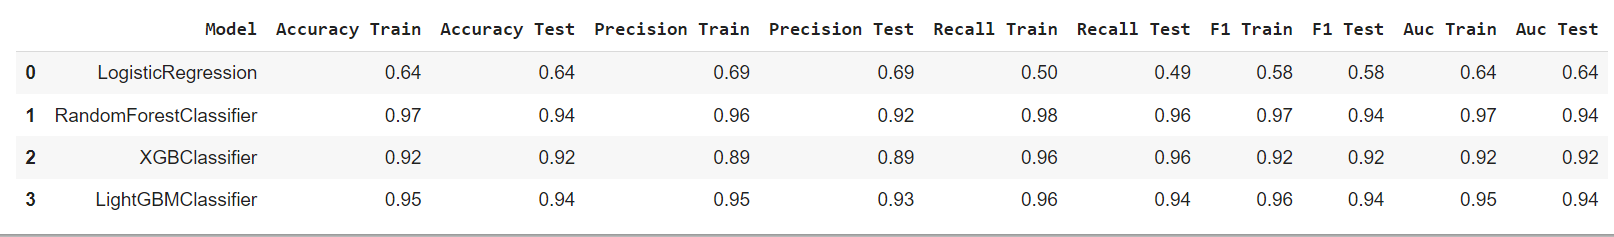

# We have Selected Random Forest as a best Classification Model

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***